In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import time
from torchvision.transforms import transforms # for image transformation
from torchvision.models import vgg16
from PIL import Image

In [2]:
train_data_path = r"E:\AbioticNeuron\DS\Pytorch\fmnist_problem\dataset\fashion-mnist_train.csv"
test_data_path = r"E:\AbioticNeuron\DS\Pytorch\fmnist_problem\dataset\fashion-mnist_test.csv"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Data Preprocessing for VGG16 architecture

1. (1,784) to (28, 28)
2. change dtype to uint8
3. make (3, 28, 28)
4. tensor to PIL image format
5. Resize to (3, 256, 256)
6. Center Crop (2, 224, 224)
7. Scale Values between 0 and 1
8. Normalization values using specified mean and std values for each channel

In [3]:
# defining image transformation
preprocess_for_vgg16 = transforms.Compose( # combines multiple transformations in sequence
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

## Creating DataSet Objects

In [4]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y, transform):
        super().__init__()
        self.features = np.array(x) 
        self.labels = np.array(y)
        self.transformation = transform
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        x = self.features[index, :]
        y = torch.tensor(self.labels[index], dtype=torch.long)

        # reshape to 28x28
        x = x.reshape(28, 28).astype(np.uint8)

        # convert grey to RGB
        x = np.stack([x]*3, axis=-1)

        # PIL image
        x = Image.fromarray(x)

        # transformations
        x = self.transformation(x)

        return x, y



In [5]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data_x = train_data.iloc[:, 1:]
train_data_y = train_data.iloc[:,0]

test_data_x = test_data.iloc[:, 1:]
test_data_y = test_data.iloc[:,0]

In [6]:
train_dataset = FMNISTDataset(train_data_x, train_data_y, preprocess_for_vgg16)
test_dataset = FMNISTDataset(test_data_x, test_data_y, preprocess_for_vgg16)

train_data_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

## Model initialization and modification

In [7]:
vgg16 = vgg16(pretrained=True)

e:\Python_Virtual_Environments\torch_learn_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Python_Virtual_Environments\torch_learn_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [10]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [11]:
# freezing weights of features layer

for parameter in vgg16.features.parameters():
    parameter.requires_grad = False

In [12]:
# replacing classifier layer
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(1024, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 10),
)

In [13]:
vgg16.to(device=device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
learning_rate = 0.0001 
epochs = 35
lambda_val = 1e-4

In [15]:
# optimizer and loss function
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr = learning_rate, weight_decay=lambda_val)

## Model Finetuning

In [16]:
epoch_losses = []  # list to store avg loss per epoch

for epoch in range(epochs):
    avg_loss = 0
    for x, y in train_data_loader:
        x = x.to(device)
        y = y.to(device)
        prediction = vgg16(x)
        loss = loss_function(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item()

    avg_loss_epoch = avg_loss / len(train_data_loader)
    epoch_losses.append(avg_loss_epoch)  # store for plotting later
    print(f"Epoch-{epoch+1} => Loss: {avg_loss_epoch}")


Epoch-1 => Loss: 0.3129572554676136
Epoch-2 => Loss: 0.17613665094730188
Epoch-3 => Loss: 0.1263499286399086
Epoch-4 => Loss: 0.08759634144234854
Epoch-5 => Loss: 0.059915434888828153
Epoch-6 => Loss: 0.045840902186841816
Epoch-7 => Loss: 0.034989829662709936
Epoch-8 => Loss: 0.026553619463346216
Epoch-9 => Loss: 0.02503321647745441
Epoch-10 => Loss: 0.020777384450299297
Epoch-11 => Loss: 0.018504902498069235
Epoch-12 => Loss: 0.016209479232574615


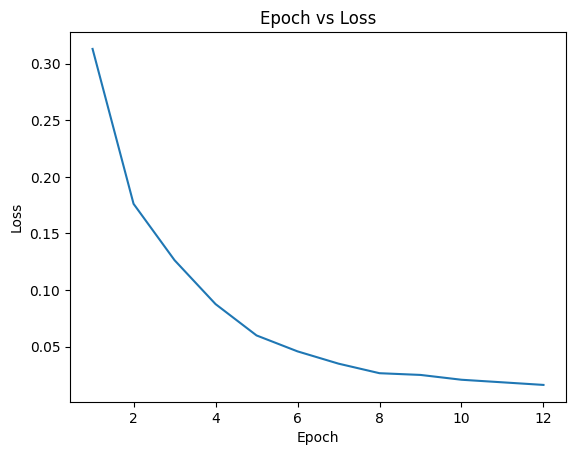

In [17]:
plt.plot(range(1, epochs+1), epoch_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.show()

## Model Evaluation

In [18]:
vgg16.eval()

train_total = 0
train_correct = 0
test_total = 0
test_correct = 0

with torch.no_grad():
    # Train data accuracy
    for x, y in train_data_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = vgg16(x)                          # (batch_size, num_classes)
        predicted = torch.argmax(y_pred, dim=1)    # (batch_size,)
        train_total += y.size(0)
        train_correct += (predicted == y).sum().item()

    # Test data accuracy
    for x, y in test_data_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = vgg16(x)
        predicted = torch.argmax(y_pred, dim=1)
        test_total += y.size(0)
        test_correct += (predicted == y).sum().item()

# Results (formatted)
print("=" * 50)
print(f"{'Dataset':<12} {'Size':>8} {'Accuracy':>12}")
print("-" * 50)
print(f"{'Train':<12} {train_total:>8} {train_correct / train_total:>11.4%}")
print(f"{'Test':<12} {test_total:>8} {test_correct / test_total:>11.4%}")
print("=" * 50)


Dataset          Size     Accuracy
--------------------------------------------------
Train           60000    99.7250%
Test            10000    92.9800%


In [19]:
# saving the model
torch.save(vgg16.state_dict(), "vgg16_fmnist.pth")
